In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# Import Dataset

In [158]:
marketing_data = pd.read_csv('/content/marketing_campaign.csv')

In [159]:
marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,...,5,0,0,0,0,0,0,3,11,0


In [160]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [161]:
marketing_data.shape

(2240, 29)

## Checking for null values

In [162]:
marketing_data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [163]:
marketing_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## DISTRIBUTION OF CATEGORICAL VARIABLES

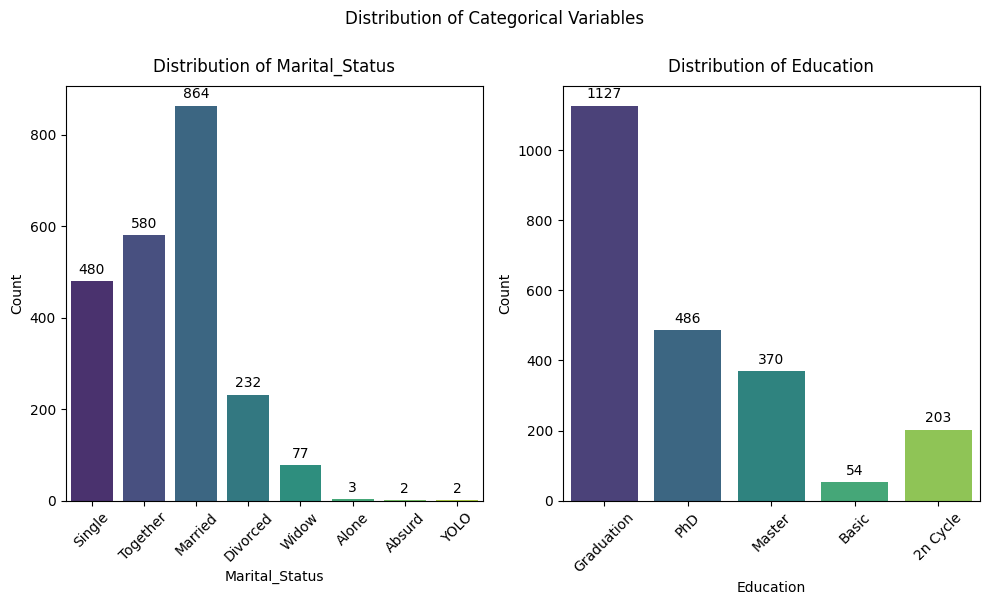

In [164]:
categorical_columns = ['Marital_Status', 'Education']

# Create a figure with a grid layout (4 rows x 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Distribution of Categorical Variables', fontsize=12, y=1)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create countplots for each categorical variable
for idx, column in enumerate(categorical_columns):
    sns.countplot(data=marketing_data, x=column, ax=axes[idx], palette='viridis', hue= column, legend=False)

    # Customize each subplot
    axes[idx].set_title(f'Distribution of {column}', pad=10)
    axes[idx].tick_params(axis='x', rotation=45)

    # Add value labels on top of each bar
    for container in axes[idx].containers:
        axes[idx].bar_label(container, padding=3)

    # Adjust y-axis label
    axes[idx].set_ylabel('Count')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

# Data Preprocessing and Handling

In [165]:
marketing_data.dropna(inplace=True)
marketing_data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


## Converting Dt_Customer column to Date type

In [166]:
marketing_data['Dt_Customer'] = pd.to_datetime(marketing_data['Dt_Customer'], format='%d/%m/%y')

## Creating Children, Total Amount Spent, Total Number of Purchases, Webvisits and Total Campaigns

In [167]:
marketing_data['Children']=marketing_data['Kidhome']+marketing_data['Teenhome']
marketing_data['Total_Amount']=marketing_data['MntWines']+marketing_data['MntFruits']+marketing_data['MntMeatProducts']+marketing_data['MntFishProducts']+marketing_data['MntSweetProducts']+marketing_data['MntGoldProds']
marketing_data['Total_Purchases_webvisits']=marketing_data['NumDealsPurchases']+marketing_data['NumWebPurchases']+marketing_data['NumCatalogPurchases']+marketing_data['NumStorePurchases']+marketing_data['NumWebVisitsMonth']
marketing_data['AcceptedCmp_Total']=marketing_data['AcceptedCmp1']+marketing_data['AcceptedCmp2']+marketing_data['AcceptedCmp3']+marketing_data['AcceptedCmp4']+marketing_data['AcceptedCmp5']

## Dropping aggregated columns

In [168]:
marketing_data.drop(['Kidhome','Teenhome','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts',
                     'MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
                     'NumWebVisitsMonth','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'],axis=1,inplace=True)

## Getting Current Age of Customer

In [169]:
marketing_data['Age'] = 2024 - marketing_data['Year_Birth']

In [170]:
marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Z_CostContact,Z_Revenue,Response,Children,Total_Amount,Total_Purchases_webvisits,AcceptedCmp_Total,Age
0,5524,1957,Graduation,Single,58138.0,2012-09-04,58,0,3,11,1,0,1617,32,0,67
1,2174,1954,Graduation,Single,46344.0,2014-03-08,38,0,3,11,0,2,27,11,0,70
2,4141,1965,Graduation,Together,71613.0,2013-08-21,26,0,3,11,0,0,776,25,0,59
3,6182,1984,Graduation,Together,26646.0,2014-02-10,26,0,3,11,0,1,53,14,0,40
4,5324,1981,PhD,Married,58293.0,2014-01-19,94,0,3,11,0,1,422,24,0,43


## Categorical Data Preprocessing

In [171]:
marketing_data['Education'].value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


In [172]:
marketing_data['Education'] = marketing_data['Education'].replace(['Basic'],'Undergraduate')
marketing_data['Education'] = marketing_data['Education'].replace(['2n Cycle','Graduation'],'Graduate')
marketing_data['Education'] = marketing_data['Education'].replace(['PhD','Master'],'Post Graduate')

In [173]:
marketing_data['Education'].value_counts()

,count
Education,
Graduate,1316
Post Graduate,846
Undergraduate,54


In [174]:
marketing_data['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


## TOTAL AMOUNT SPENT BY EDUCATION

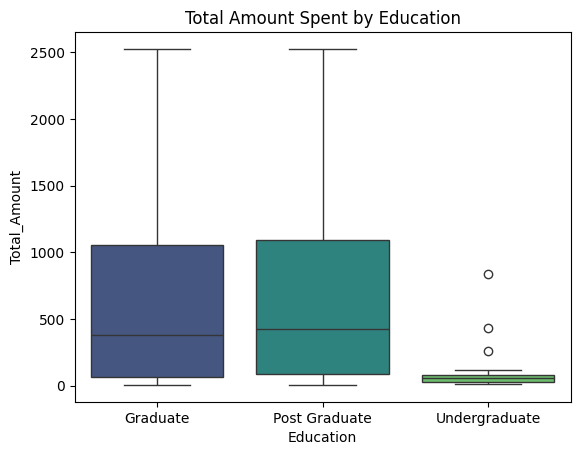

<Figure size 640x480 with 0 Axes>

In [175]:
sns.boxplot(data=marketing_data, x='Education', y='Total_Amount', palette='viridis', hue = 'Education')
plt.title('Total Amount Spent by Education')
plt.show()
plt.tight_layout()

In [176]:
marketing_data['Marital_Status'] = marketing_data['Marital_Status'].replace(['Married','Together'],'Relationship')
marketing_data['Marital_Status'] = marketing_data['Marital_Status'].replace(['Single','Divorced','Widow','Alone','Absurd','YOLO'],'Single')

In [177]:
marketing_data['Marital_Status'].value_counts()

,count
Marital_Status,
Relationship,1430
Single,786


## TOTAL AMOUNT SPENT BY MARITAL STATUS

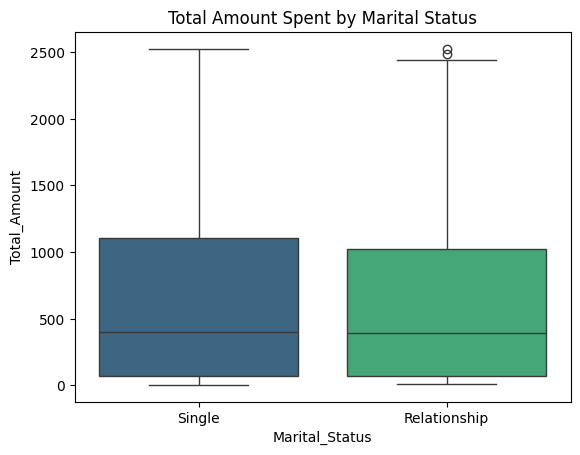

<Figure size 640x480 with 0 Axes>

In [178]:
sns.boxplot(data=marketing_data, x='Marital_Status', y='Total_Amount', palette='viridis', hue = 'Marital_Status')
plt.title('Total Amount Spent by Marital Status')
plt.show()
plt.tight_layout()

In [179]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID                         2216 non-null   int64         
 1   Year_Birth                 2216 non-null   int64         
 2   Education                  2216 non-null   object        
 3   Marital_Status             2216 non-null   object        
 4   Income                     2216 non-null   float64       
 5   Dt_Customer                2216 non-null   datetime64[ns]
 6   Recency                    2216 non-null   int64         
 7   Complain                   2216 non-null   int64         
 8   Z_CostContact              2216 non-null   int64         
 9   Z_Revenue                  2216 non-null   int64         
 10  Response                   2216 non-null   int64         
 11  Children                   2216 non-null   int64         
 12  Total_Amoun

## CORRELATION HEATMAP

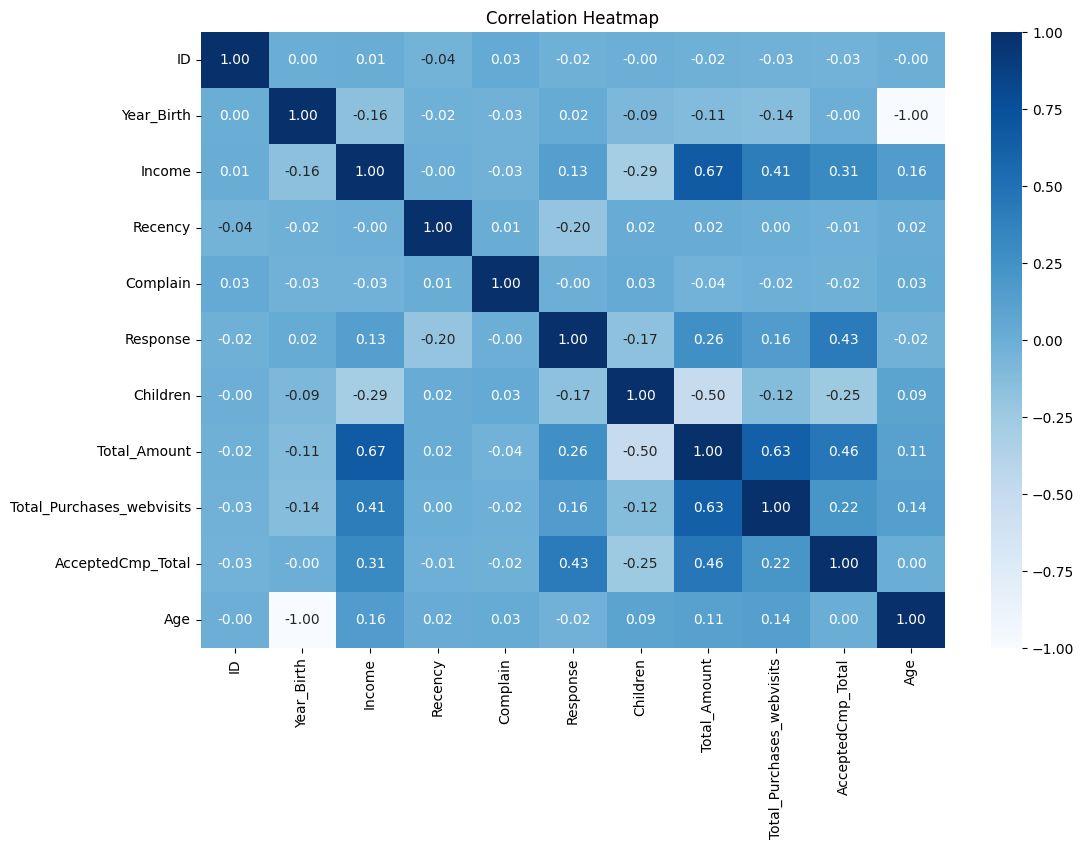

In [180]:
# Define numerical features excluding specific columns
numerical_features = marketing_data.select_dtypes(include=['float64', 'int64']).columns
numerical_features = [col for col in numerical_features if col not in ['Z_CostContact', 'Z_Revenue']]

# Create correlation matrix
correlation_matrix = marketing_data[numerical_features].corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## INCOME BY TOTAL AMOUNT SPENT

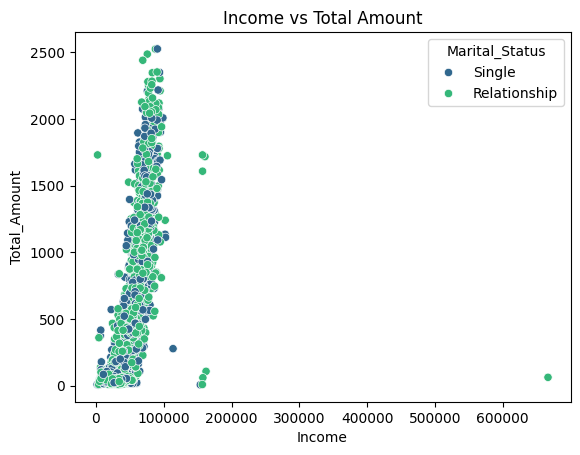

In [181]:
sns.scatterplot(data=marketing_data, x='Income', y='Total_Amount', hue='Marital_Status', palette='viridis')
plt.title('Income vs Total Amount')
plt.show()

## NUMERICAL DISTRIBUTION

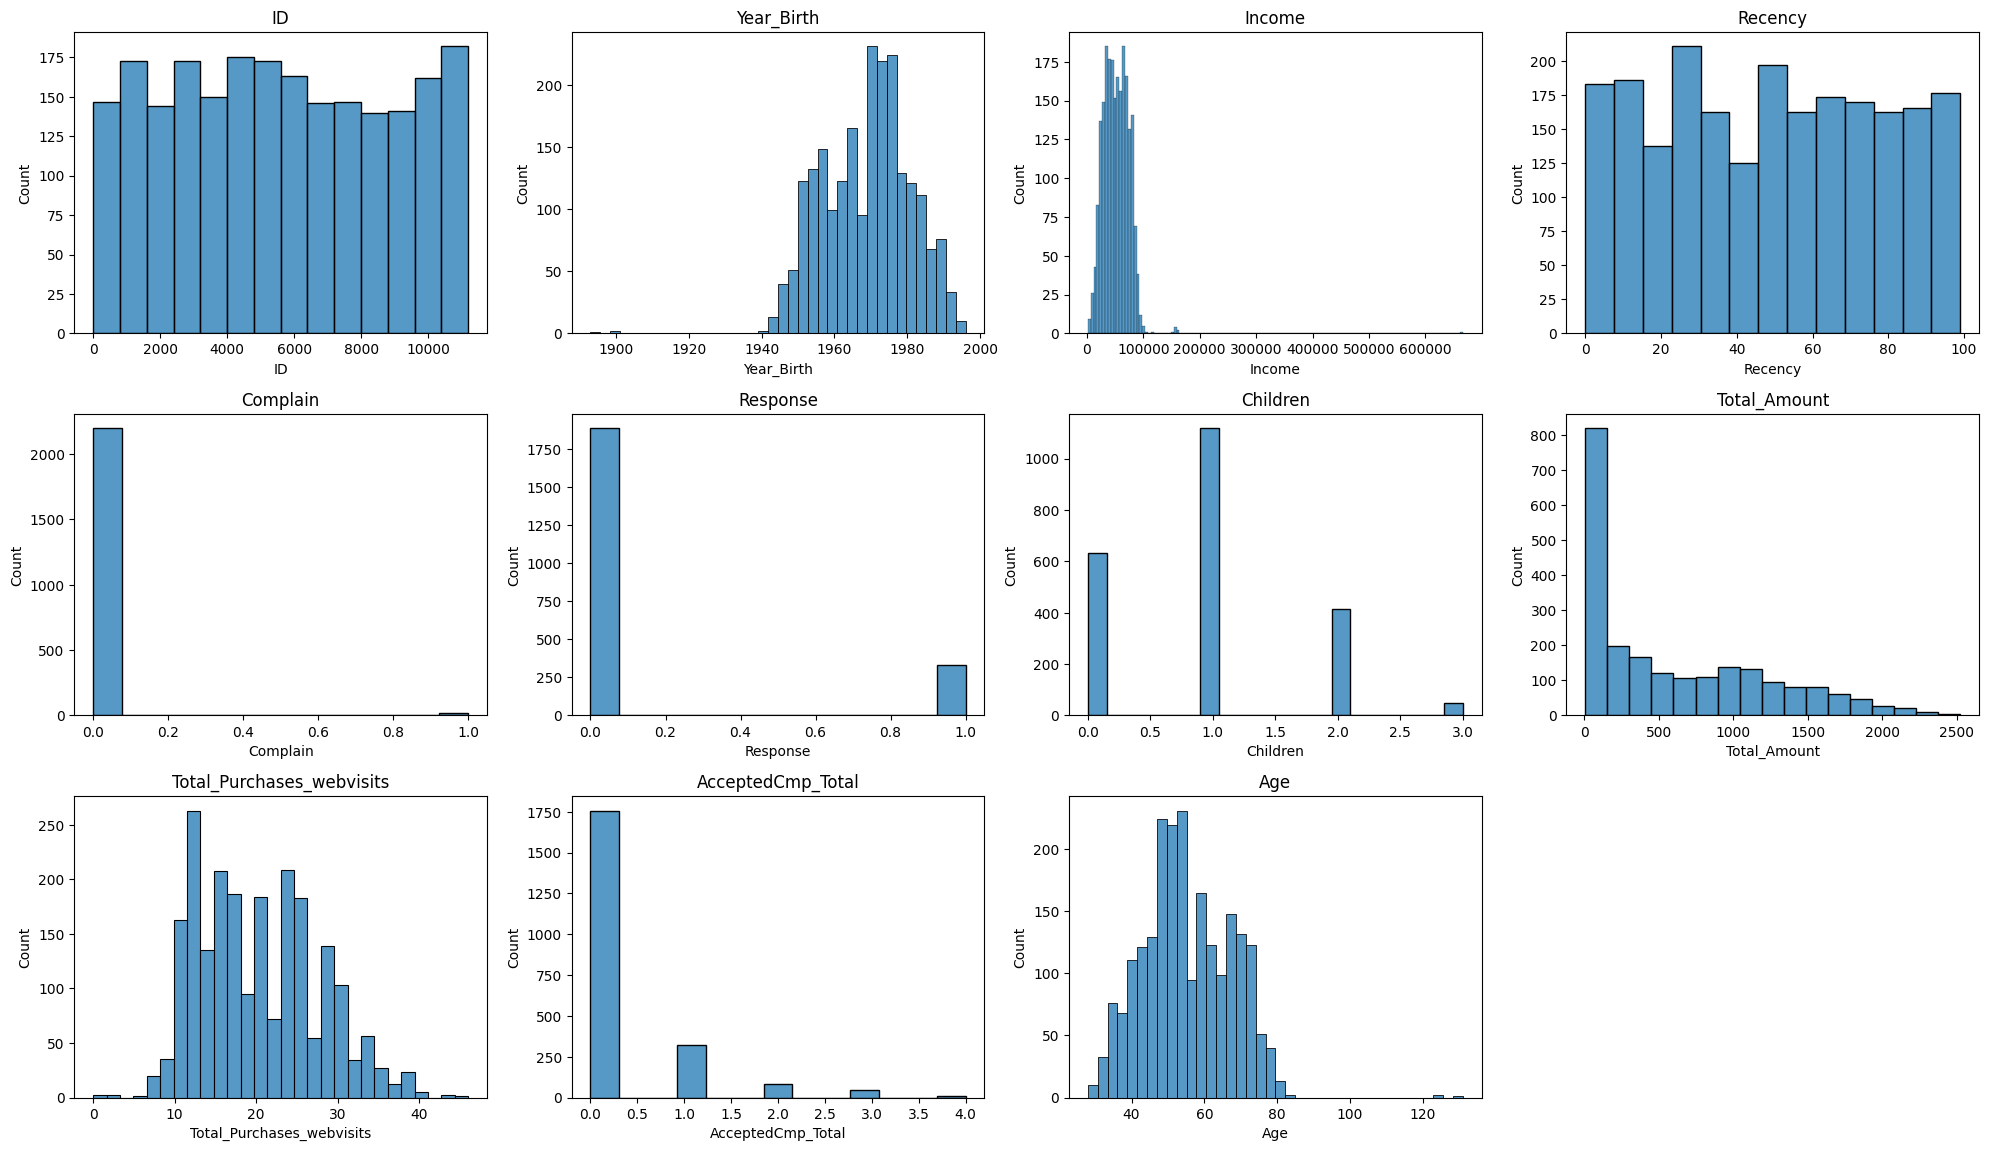

In [182]:
plt.figure(figsize=(20, 15))

# Plot each feature
for idx, col in enumerate(numerical_features, 1):
    plt.subplot(4, 4, idx)
    sns.histplot(data=marketing_data, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

## DROPPING NON NUMERICAL VARIABLES AND ID

In [183]:
marketing_data_num = marketing_data.drop(['ID','Year_Birth','Dt_Customer','Marital_Status', 'Education'], axis = 1)
marketing_data_num.head()

,Income,Recency,Complain,Z_CostContact,Z_Revenue,Response,Children,Total_Amount,Total_Purchases_webvisits,AcceptedCmp_Total,Age
0,58138.0,58,0,3,11,1,0,1617,32,0,67
1,46344.0,38,0,3,11,0,2,27,11,0,70
2,71613.0,26,0,3,11,0,0,776,25,0,59
3,26646.0,26,0,3,11,0,1,53,14,0,40
4,58293.0,94,0,3,11,0,1,422,24,0,43


## FEATURE SELECTION

In [184]:
## Check for variance and remove features with low variance
from sklearn.feature_selection import VarianceThreshold
variance_selector = VarianceThreshold(threshold = 0)

marketing_data_fs = variance_selector.fit_transform(marketing_data_num)


print(f"{marketing_data.shape[1] - marketing_data_fs.shape[1]} features have been removed, {marketing_data_fs.shape[1]} features remain")

7 features have been removed, 9 features remain


## STANDARDIZING VALUES USING STANDARDSCALER

In [185]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
marketing_data_scaled = scaler.fit_transform(marketing_data_fs)

## PCA

In [186]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_array = pca.fit_transform(marketing_data_scaled)

## DETERMINING OPTIMAL NUMBER OF CLUSTER USING ELBOW METHOD

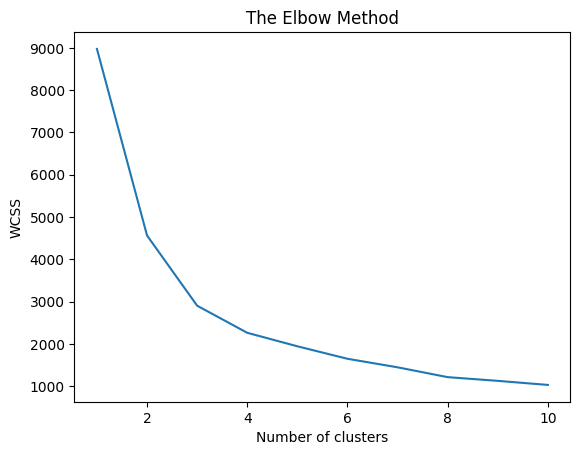

In [187]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca_array)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## APPLYING OPTIMAL NUMBER OF CLUSTERS

In [189]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(pca_array)

## VISUALIZING CLUSTERS

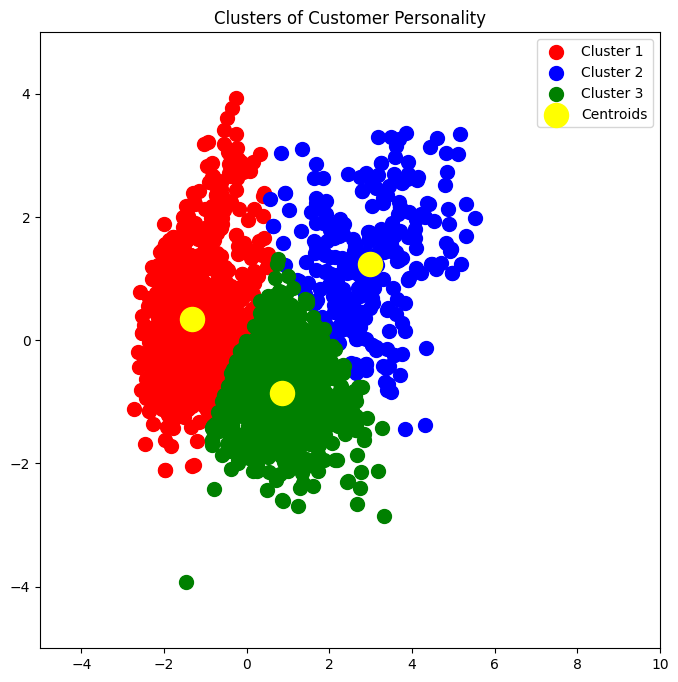

In [190]:

plt.figure(figsize=(8,8))
plt.scatter(pca_array[y_kmeans == 0,0], pca_array[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(pca_array[y_kmeans == 1,0], pca_array[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(pca_array[y_kmeans == 2,0], pca_array[y_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customer Personality')
plt.xlim(-5,10)
plt.ylim(-5,5)
plt.legend()
plt.show()

## EXPLAINED VARIANCE RATIO

In [188]:
sum(pca.explained_variance_ratio_)

0.4499702439024649

## SILHOUETTE SCORE

In [191]:
from sklearn.metrics import silhouette_score
silhouette_score(pca_array, y_kmeans)

0.46699084060671275

## K-MEANS CLUSTER EVALUATION

In [199]:
marketing_data_num['Cluster Number'] = y_kmeans
marketing_data_num.head()

,Income,Recency,Complain,Z_CostContact,Z_Revenue,Response,Children,Total_Amount,Total_Purchases_webvisits,AcceptedCmp_Total,Age,Cluster Number
0,58138.0,58,0,3,11,1,0,1617,32,0,67,1
1,46344.0,38,0,3,11,0,2,27,11,0,70,0
2,71613.0,26,0,3,11,0,0,776,25,0,59,2
3,26646.0,26,0,3,11,0,1,53,14,0,40,0
4,58293.0,94,0,3,11,0,1,422,24,0,43,2


In [200]:
marketing_data_num.groupby('Cluster Number').mean()

,Income,Recency,Complain,Z_CostContact,Z_Revenue,Response,Children,Total_Amount,Total_Purchases_webvisits,AcceptedCmp_Total,Age
Cluster Number,,,,,,,,,,,
0,35907.669033,47.499556,0.010648,3.0,11.0,0.093168,1.252884,127.020408,15.204969,0.076309,52.307897
1,78537.621212,36.946970,0.003788,3.0,11.0,0.791667,0.242424,1472.299242,25.037879,1.446970,53.916667
2,66155.192727,54.940606,0.009697,3.0,11.0,0.023030,0.755152,985.987879,25.475152,0.233939,59.506667


## USING DENDROGRAM TO IDENTIFY NUMBER OF CLUSTERS

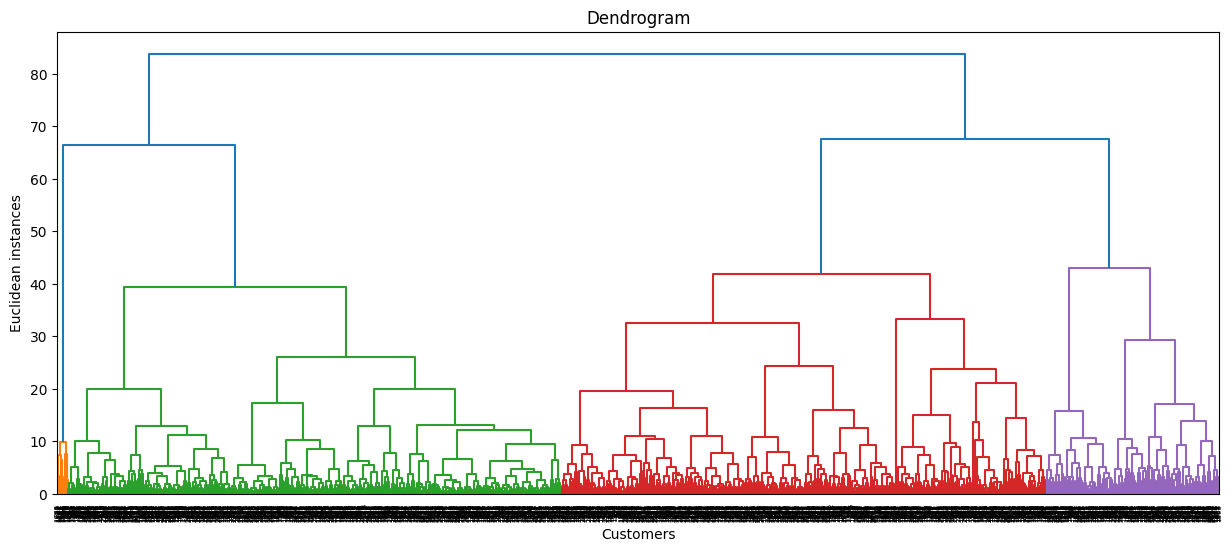

In [192]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (15,6))
dendrogram = sch.dendrogram(sch.linkage(marketing_data_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean instances')
plt.show()

## FITTING HIERARCHICHAL CLUSTERING TO DATASET

In [203]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(pca_array)

## VISUALIZING CLUSTERS

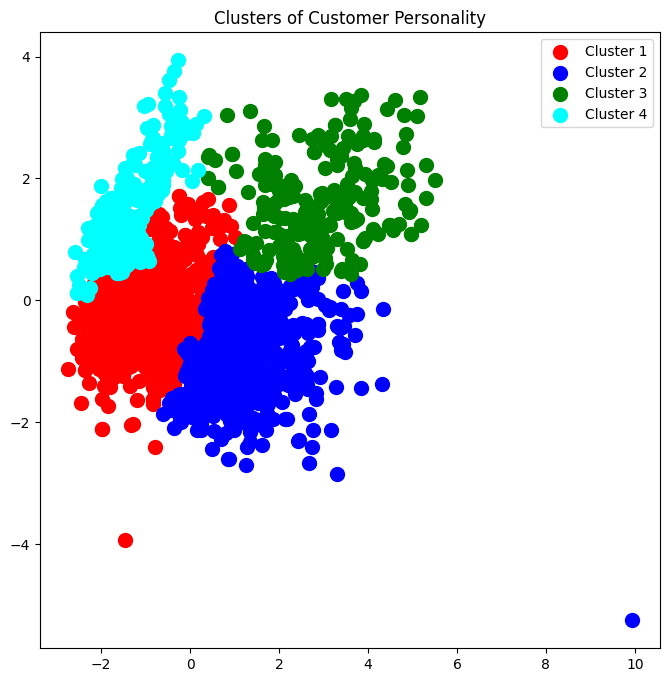

In [204]:
plt.figure(figsize=(8,8))
plt.scatter(pca_array[y_hc == 0,0], pca_array[y_hc == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(pca_array[y_hc == 1,0], pca_array[y_hc == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(pca_array[y_hc == 2,0], pca_array[y_hc == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(pca_array[y_hc == 3,0], pca_array[y_hc == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of Customer Personality')
plt.legend()
plt.show()

## HIERARCHICAL CLUSTER EVALUATION

In [205]:
marketing_data_num['Cluster Number HC'] = y_hc
marketing_data_num.head()

,Income,Recency,Complain,Z_CostContact,Z_Revenue,Response,Children,Total_Amount,Total_Purchases_webvisits,AcceptedCmp_Total,Age,Cluster Number,Cluster Number HC
0,58138.0,58,0,3,11,1,0,1617,32,0,67,1,1
1,46344.0,38,0,3,11,0,2,27,11,0,70,0,0
2,71613.0,26,0,3,11,0,0,776,25,0,59,2,1
3,26646.0,26,0,3,11,0,1,53,14,0,40,0,3
4,58293.0,94,0,3,11,0,1,422,24,0,43,2,0


In [206]:
marketing_data_num.groupby('Cluster Number HC').mean()

,Income,Recency,Complain,Z_CostContact,Z_Revenue,Response,Children,Total_Amount,Total_Purchases_webvisits,AcceptedCmp_Total,Age,Cluster Number
Cluster Number HC,,,,,,,,,,,,
0,42415.652418,55.760405,0.010124,3.0,11.0,0.044994,1.311586,216.840270,17.119235,0.064117,56.461192,0.326209
1,70031.147541,55.770492,0.009563,3.0,11.0,0.050546,0.661202,1127.073770,26.243169,0.316940,59.751366,1.924863
2,74373.485981,32.766355,0.004673,3.0,11.0,0.873832,0.261682,1415.285047,24.462617,1.532710,51.822430,1.004673
3,28592.304462,29.409449,0.010499,3.0,11.0,0.181102,1.031496,64.616798,13.383202,0.115486,45.291339,0.000000


## SILHOUETTE SCORE

In [194]:
from sklearn.metrics import silhouette_score
silhouette_score(pca_array, y_hc)

0.3072840538635855